In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("real_estate.csv").iloc[:,2:]
data.columns = ["house_age", "distance_to_the_nearest_MRT_station", "number_of_convenience_stores",
               "latitude", "longitude", "house_price_of_unit_area"]
data.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


Let's scale the data with the StandardScaler from SKLearn.

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
X = scaled_data[:,:-1]
y = scaled_data[:,-1]

Let's split the data into a training and testing set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
# Ordinary Least Squares Regression
reg = LinearRegression().fit(X_train, y_train)
preds_train = reg.predict(X_train)
preds_test = reg.predict(X_test)

print(f"training MSE:\t{mean_squared_error(y_train, preds_train)}")
print(f"testing MSE:\t{mean_squared_error(y_test, preds_test)}")

training MSE:	0.38451438153876344
testing MSE:	0.5380958123908647


In [6]:
# Lasso Regression
lasso = Lasso().fit(X_train, y_train)
lasso_preds_train = lasso.predict(X_train)
lasso_preds_test = lasso.predict(X_test)

print(f"lasso training MSE:\t{mean_squared_error(y_train, lasso_preds_train)}")
print(f"lasso testing MSE:\t{mean_squared_error(y_test, lasso_preds_test)}")

lasso training MSE:	0.9563901744750247
lasso testing MSE:	1.1009462715359877


In [7]:
# Ridge Regression
ridge = Ridge().fit(X_train, y_train)
ridge_preds_train = ridge.predict(X_train)
ridge_preds_test = ridge.predict(X_test)

print(f"ridge training MSE:\t{mean_squared_error(y_train, ridge_preds_train)}")
print(f"ridge testing MSE:\t{mean_squared_error(y_test, ridge_preds_test)}")

ridge training MSE:	0.384523383238431
ridge testing MSE:	0.5375804402970126


Hyperparameter Tuning Lasso and Ridge

In [8]:
# lasso and ridge alpha tuning
lasso_train_MSE = []
lasso_test_MSE = []
ridge_train_MSE = []
ridge_test_MSE = []
min_lasso_train_MSE = 10000
min_lasso_test_MSE = 10000
best_lasso_train_alpha = 0
best_lasso_test_alpha = 0
min_ridge_train_MSE = 10000
min_ridge_test_MSE = 10000
best_ridge_train_alpha = 0
best_ridge_test_alpha = 0
alphas = []
for i in range(1,200):
    lasso = Lasso(alpha=i).fit(X_train, y_train)
    lasso_train_predicts = lasso.predict(X_train)
    lasso_test_predicts = lasso.predict(X_test)
    lasso_train_MSE_value = mean_squared_error(y_train, lasso_train_predicts)
    lasso_train_MSE.append(lasso_train_MSE_value)
    lasso_test_MSE_value = mean_squared_error(y_test, lasso_test_predicts)
    lasso_test_MSE.append(lasso_test_MSE_value)
    
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    ridge_train_predicts = ridge.predict(X_train)
    ridge_test_predicts = ridge.predict(X_test)
    ridge_train_MSE_value = mean_squared_error(y_train, ridge_train_predicts)
    ridge_train_MSE.append(ridge_train_MSE_value)
    ridge_test_MSE_value = mean_squared_error(y_test, ridge_test_predicts)
    ridge_test_MSE.append(ridge_test_MSE_value)
    
    if lasso_train_MSE_value < min_lasso_train_MSE:
        min_lasso_train_MSE = lasso_train_MSE_value
        best_lasso_train_alpha = i
    
    if lasso_test_MSE_value < min_lasso_test_MSE:
        min_lasso_test_MSE = lasso_test_MSE_value
        best_lasso_test_alpha = i
    
    if ridge_train_MSE_value < min_ridge_train_MSE:
        min_ridge_train_MSE = ridge_train_MSE_value
        best_ridge_train_alpha = i
    
    if ridge_test_MSE_value < min_ridge_test_MSE:
        min_ridge_test_MSE = ridge_test_MSE_value
        best_ridge_test_alpha = i
        
    alphas.append(i)

df = pd.DataFrame({"alpha":alphas, "lasso_train_MSE":lasso_train_MSE,
                   "lasso_test_MSE":lasso_test_MSE, "ridge_train_MSE":ridge_train_MSE,
                   "ridge_test_MSE":ridge_test_MSE})

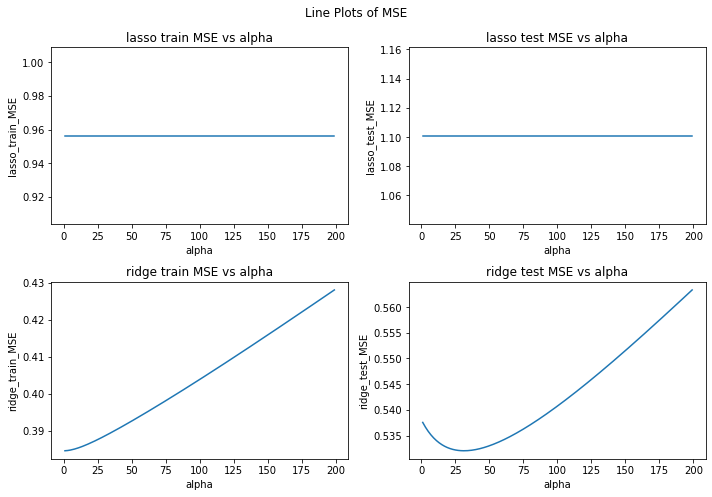

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
sns.lineplot(ax=ax[0][0] ,x="alpha", y="lasso_train_MSE", data=df)
sns.lineplot(ax=ax[0][1] ,x="alpha", y="lasso_test_MSE", data=df)
sns.lineplot(ax=ax[1][0] ,x="alpha", y="ridge_train_MSE", data=df)
sns.lineplot(ax=ax[1][1] ,x="alpha", y="ridge_test_MSE", data=df)
ax[0][0].title.set_text("lasso train MSE vs alpha")
ax[0][1].title.set_text("lasso test MSE vs alpha")
ax[1][0].title.set_text("ridge train MSE vs alpha")
ax[1][1].title.set_text("ridge test MSE vs alpha")
plt.suptitle("Line Plots of MSE")
plt.tight_layout()

In [10]:
print(f"Best Lasso Training Alpha:\t{best_lasso_train_alpha}")
print(f"Best Lasso Testing Alpha:\t{best_lasso_test_alpha}")
print(f"Best Ridge Training Alpha:\t{best_ridge_train_alpha}")
print(f"Best Ridge Testing Alpha:\t{best_ridge_test_alpha}")

Best Lasso Training Alpha:	1
Best Lasso Testing Alpha:	1
Best Ridge Training Alpha:	1
Best Ridge Testing Alpha:	31


### Conclusion

* The MSE did not change for Lasso Regression when tuning alpha.
* The alpha value for Ridge Regression does affect the MSE.
* The MSE for Ordinary Least Squares Regression was almost identical to the MSE for Ridge Regression.

In conclusion, linear regression is a good method for predicting the house price of unit area based on other vaiables. The best linear regression method discussed in this analysis is about the same between Ordinary Least Squares Regression and Ridge Regression.